In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe(include='all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
# how many null values are there in the dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [9]:
df.columns.unique()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
for col in df.columns:
    print(df [col].unique())

[       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
[20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
[7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586]
[368.51644135          nan 356.88613564 ... 258.93060041 345.70025734
 359.94857437]
[564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046]
[10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763]
[86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633]
[2.96313538 4.50065627 3.05593375 ... 3.2988755  4.70865847 2.30914906]
[0 1]


In [11]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
df['ph'].dtype

dtype('float64')

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

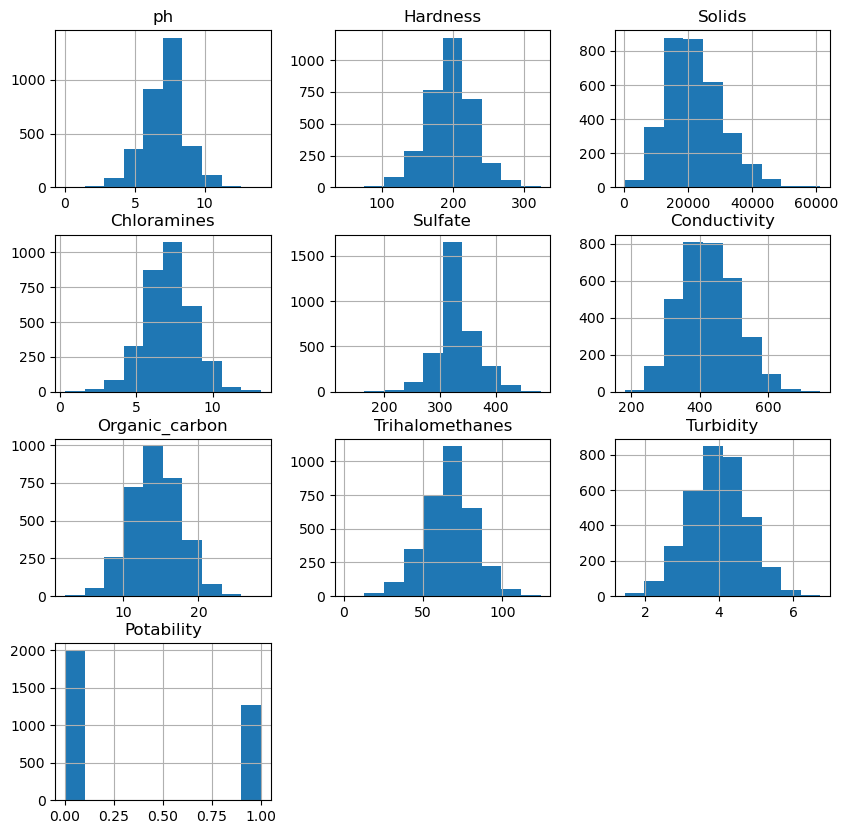

In [14]:
df.hist(figsize=(10,10))


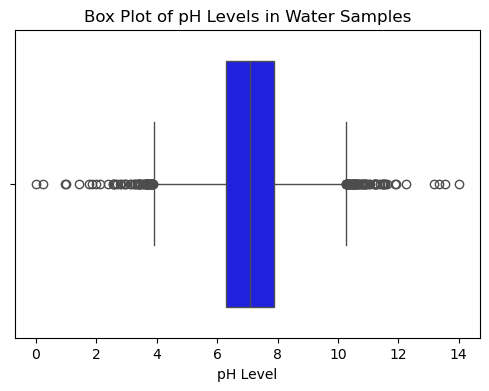

In [20]:
#box plot 
plt.figure(figsize=(6, 4))
sb.boxplot(x=df["ph"], color='blue')
plt.xlabel("pH Level")
plt.title("Box Plot of pH Levels in Water Samples")
plt.show()

In [29]:
column=df["ph"]
Q1=np.percentile(column, 25)
Q3=np.percentile(column, 75)
IQR = Q3-Q1
print("Q1:",Q1)
print("Q2:",Q3)
print("IQR",IQR)

Q1: 6.277672635884397
Q2: 7.870049755247176
IQR 1.5923771193627791


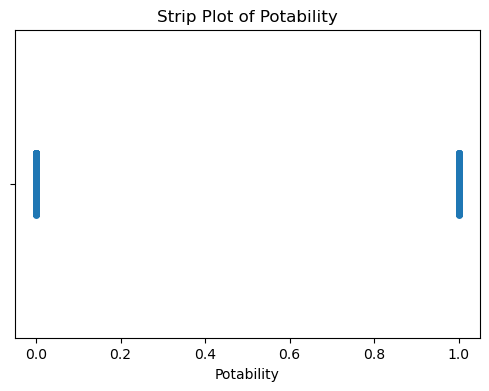

In [30]:
#strip plot
plt.figure(figsize=(6,4))
sb.stripplot(x=df[col], jitter=True)
plt.title(f"Strip Plot of {col}")
plt.show()

In [31]:
column.describe()

count    3276.000000
mean        7.080795
std         1.469956
min         0.000000
25%         6.277673
50%         7.080795
75%         7.870050
max        14.000000
Name: ph, dtype: float64

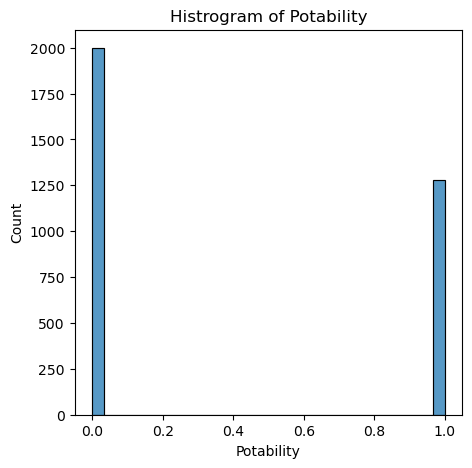

In [32]:
plt.figure(figsize=(5,5))
sb.histplot(df[col],bins=30)
plt.title(f"Histrogram of {col}")
plt.show()

In [33]:
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col]< lower_bound) | (df[col] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 0


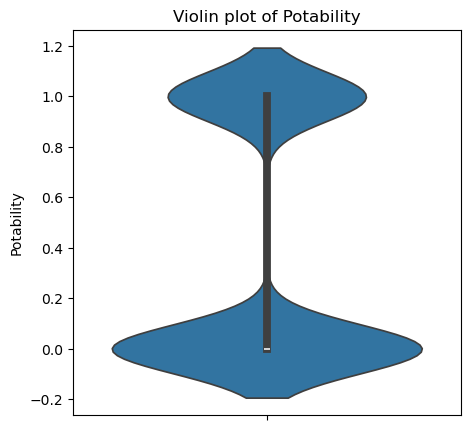

In [34]:
plt.figure(figsize=(5,5))
sb.violinplot(df[col])
plt.title(f"Violin plot of {col}")
plt.show()

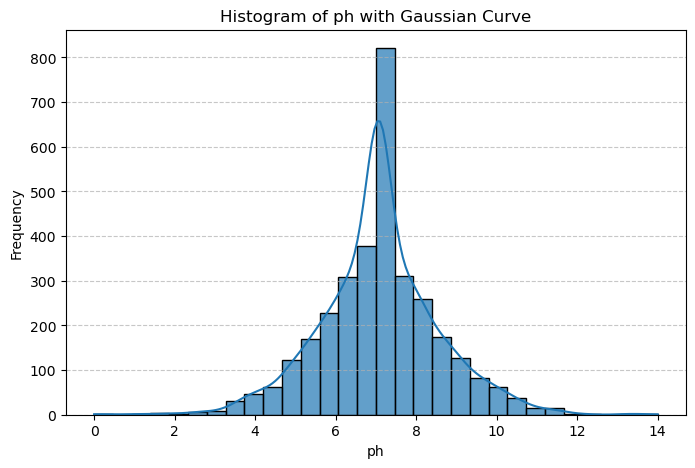

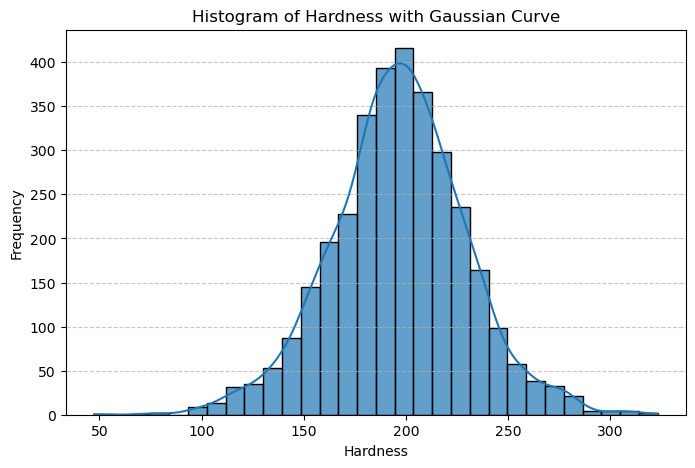

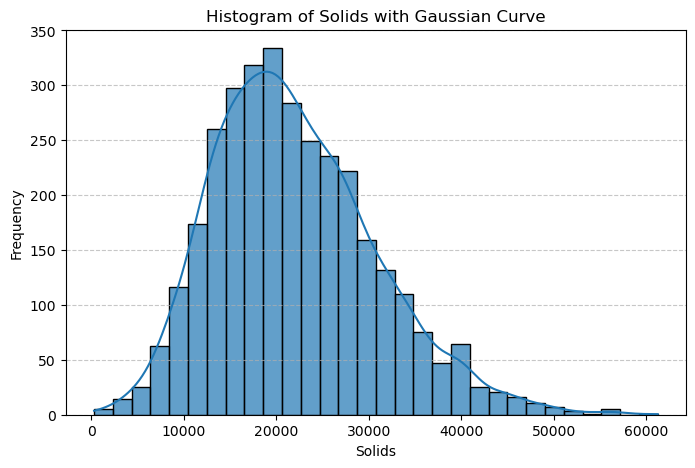

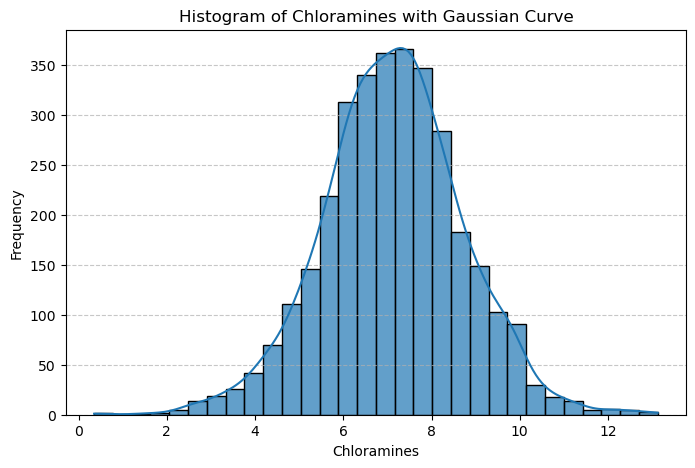

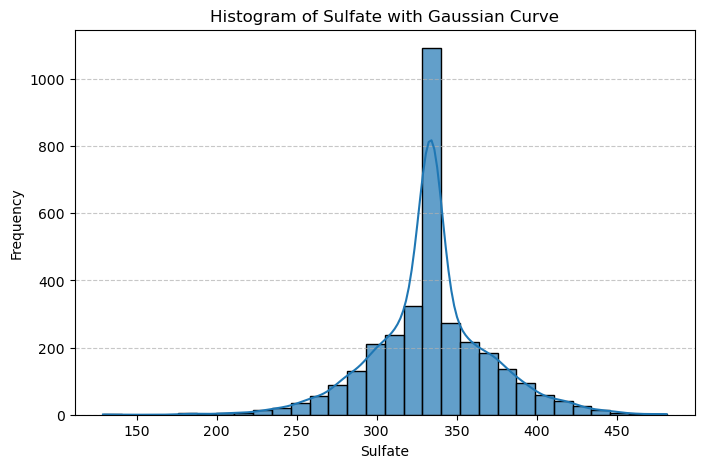

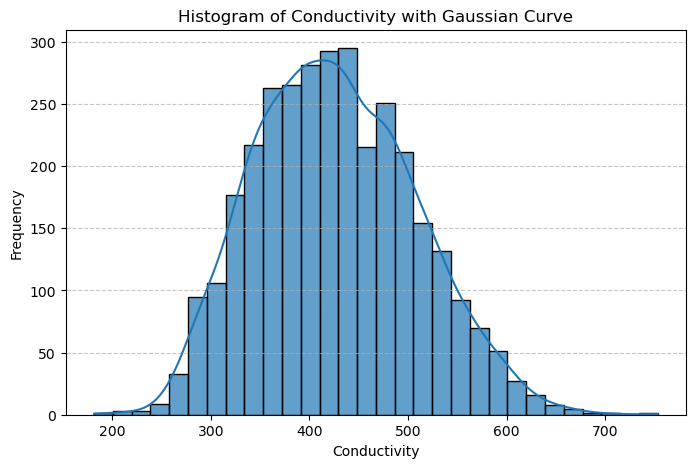

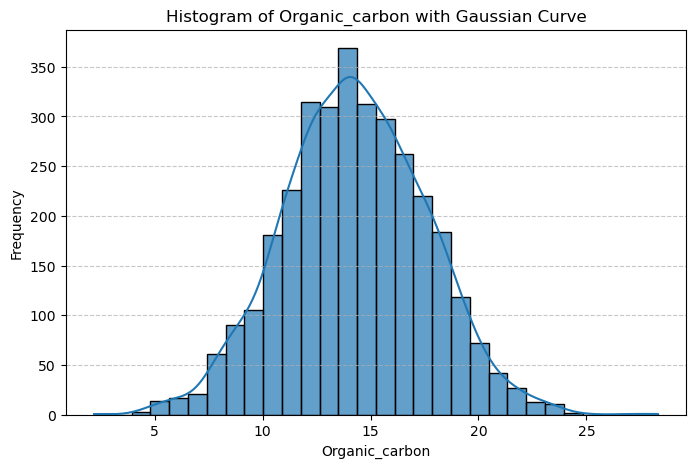

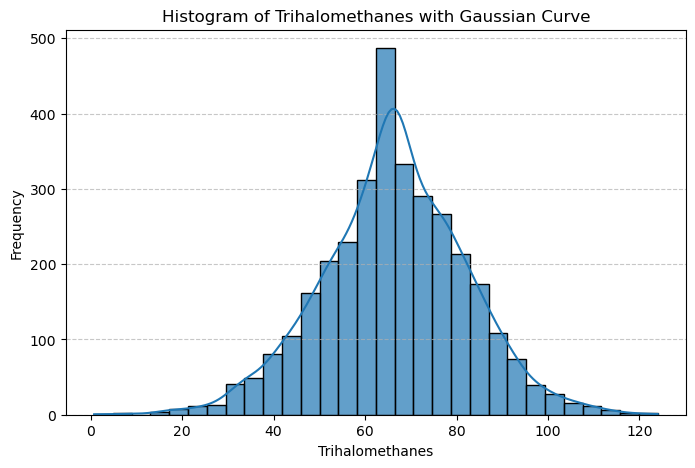

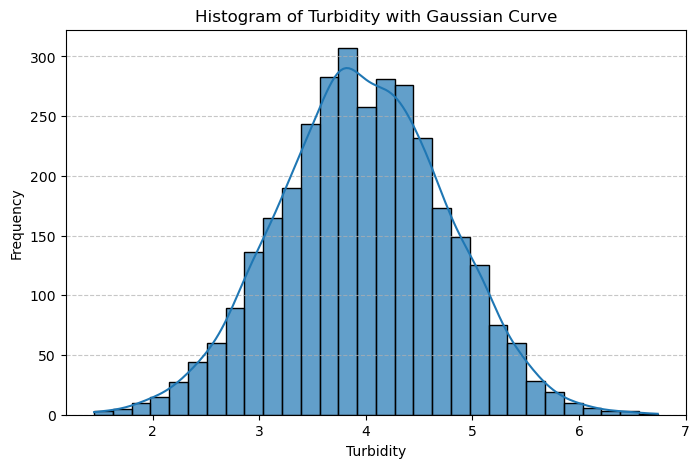

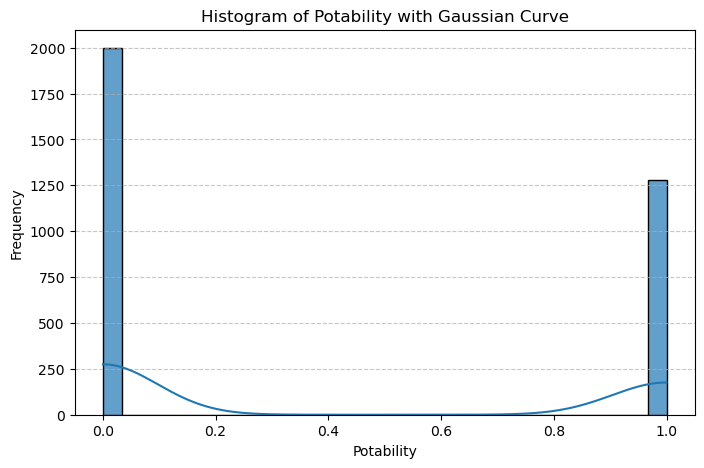

In [45]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sb.histplot(df[column].dropna(), bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column} with Gaussian Curve')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

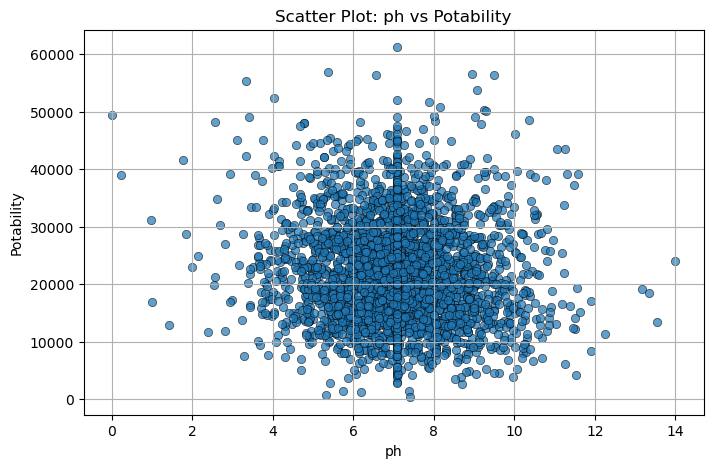

In [71]:
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['ph'], y=df['Solids'], alpha=0.7, edgecolor='k')
plt.xlabel('ph')
plt.ylabel('Potability')
plt.title('Scatter Plot: ph vs Potability')
plt.grid(True)
plt.show()

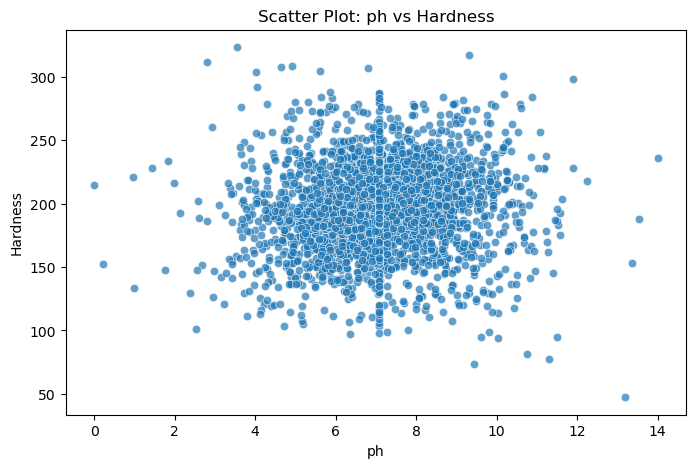

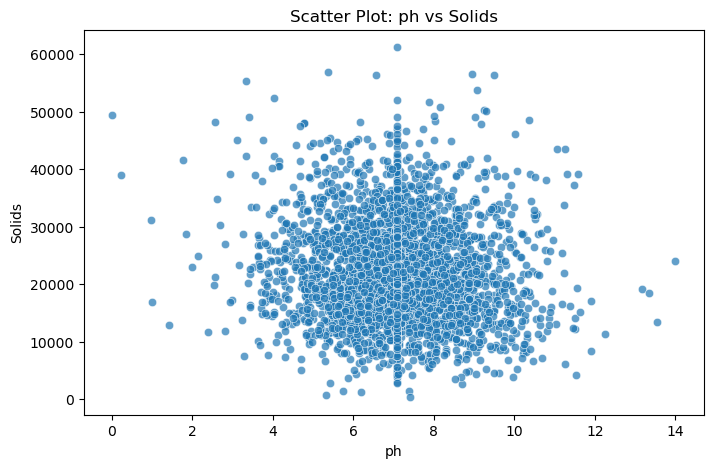

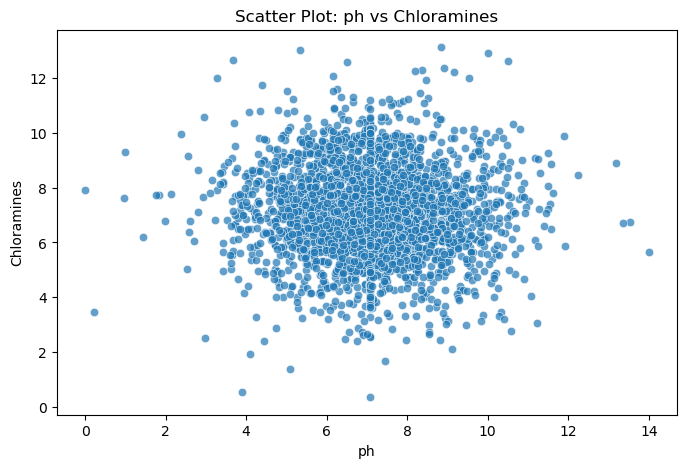

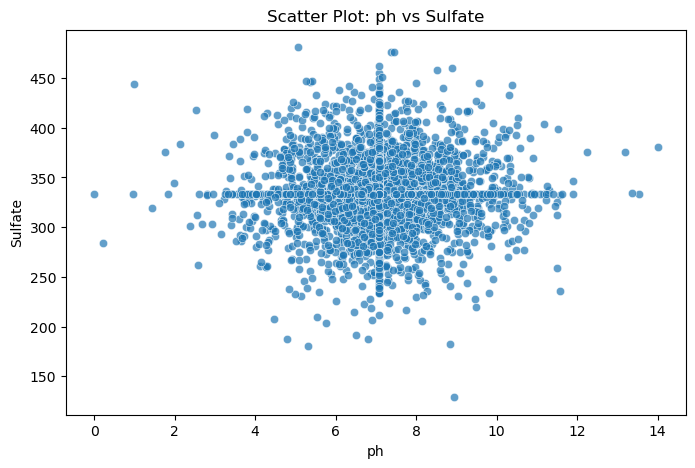

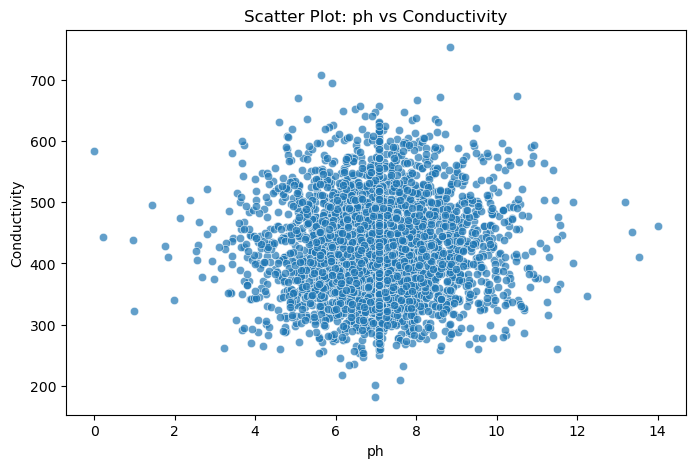

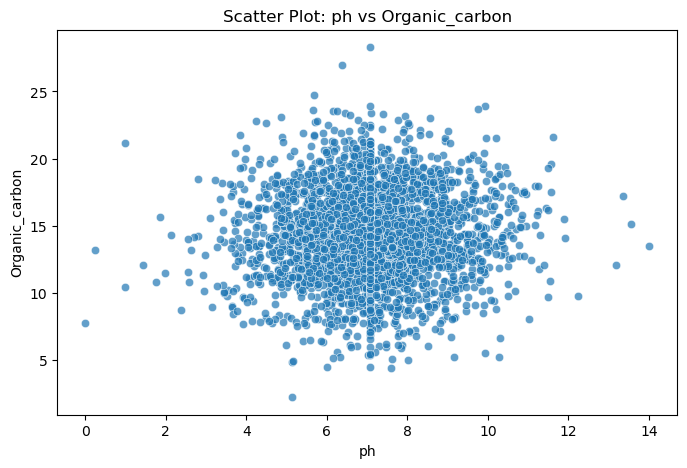

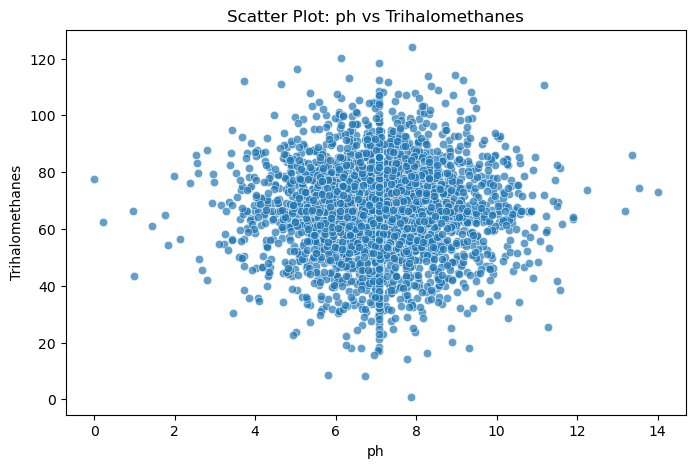

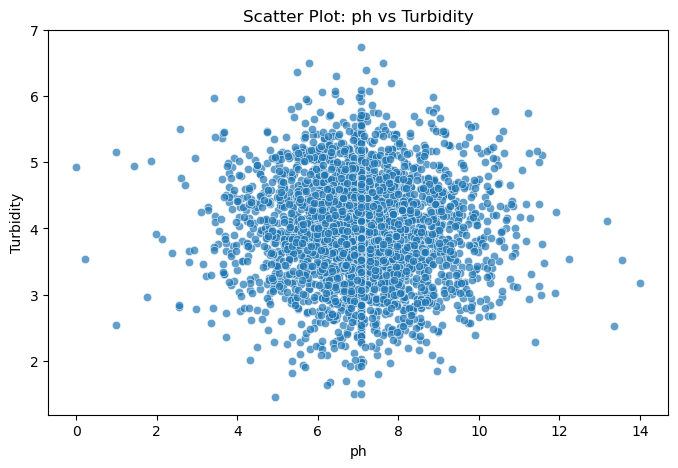

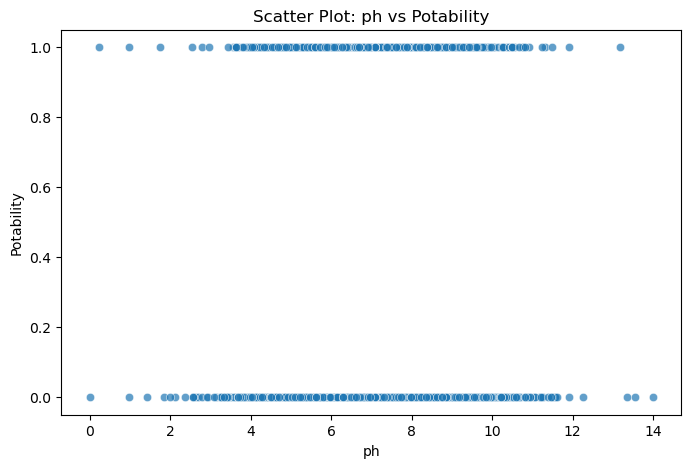

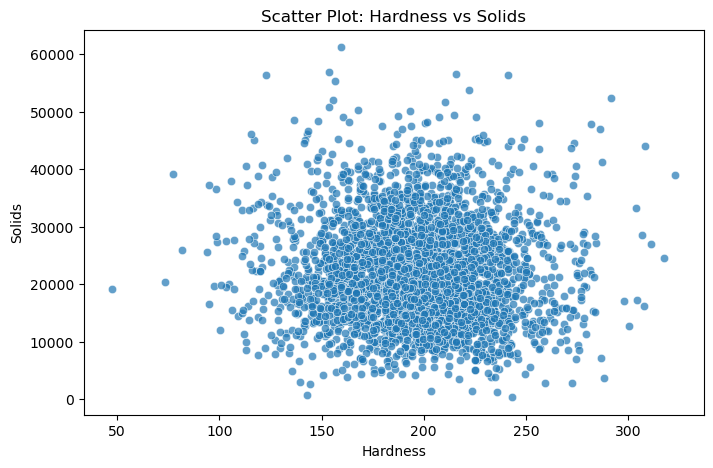

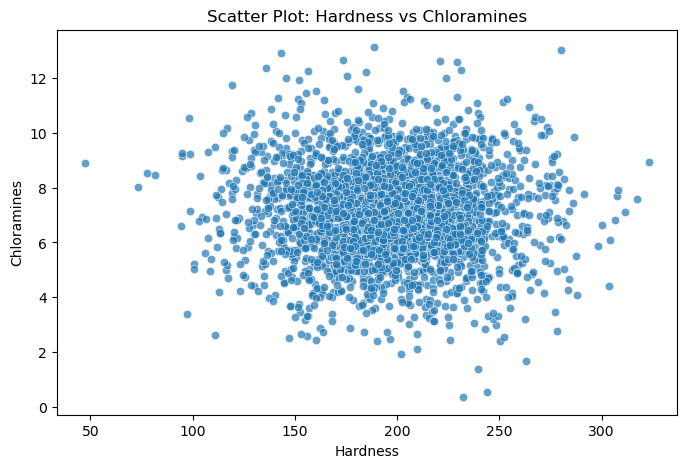

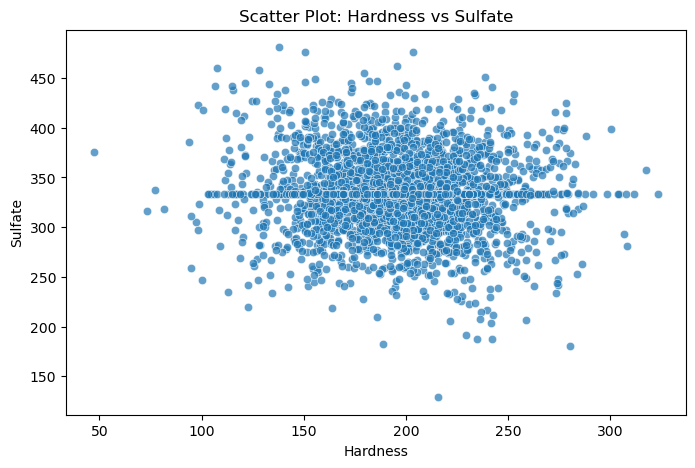

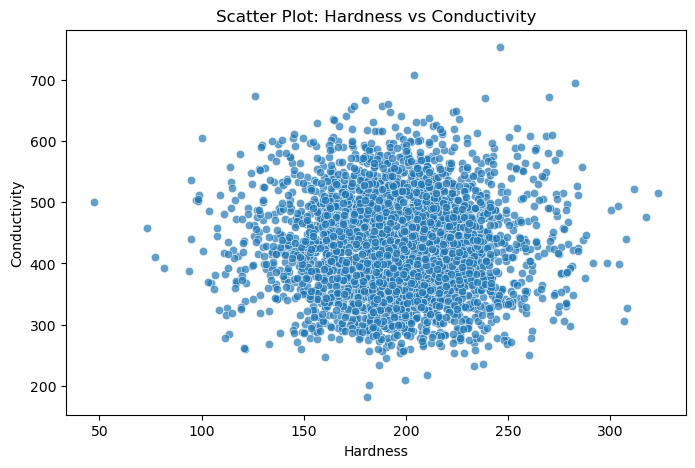

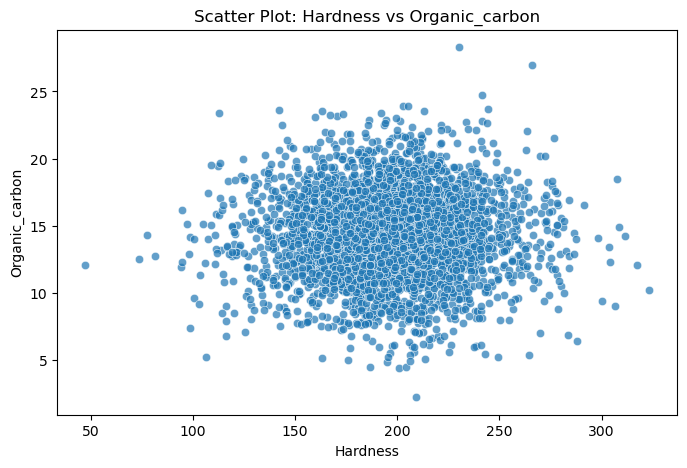

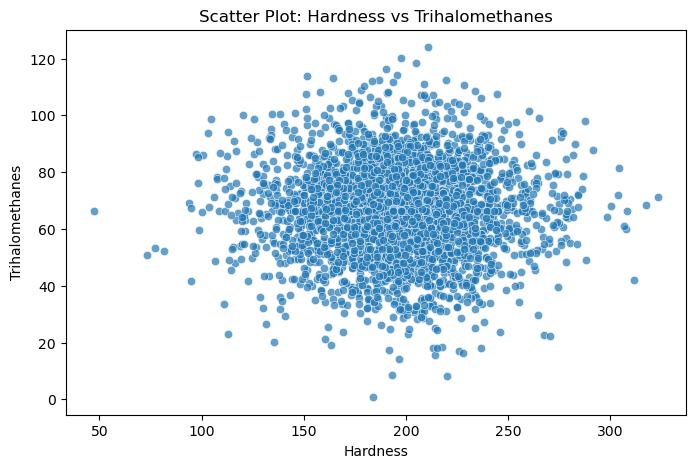

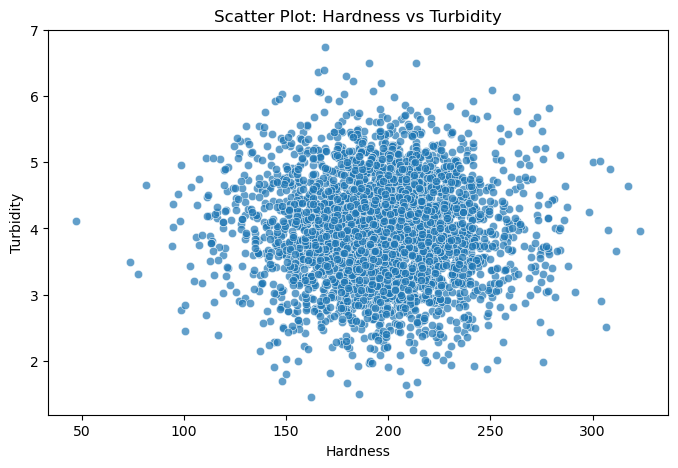

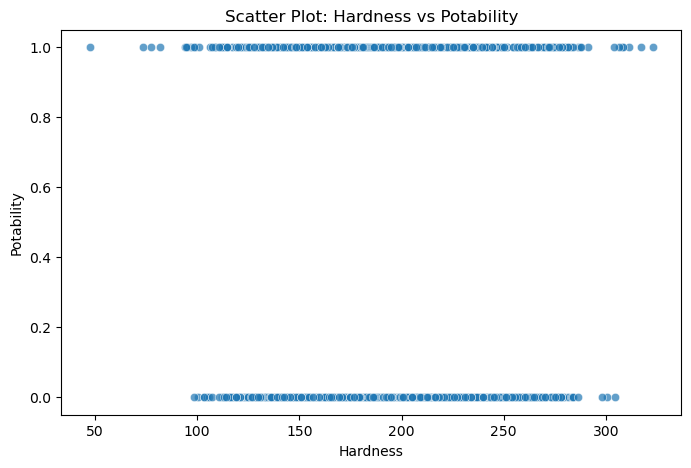

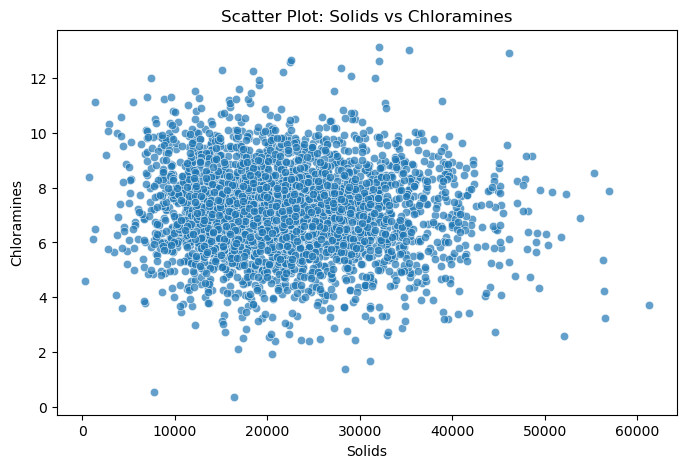

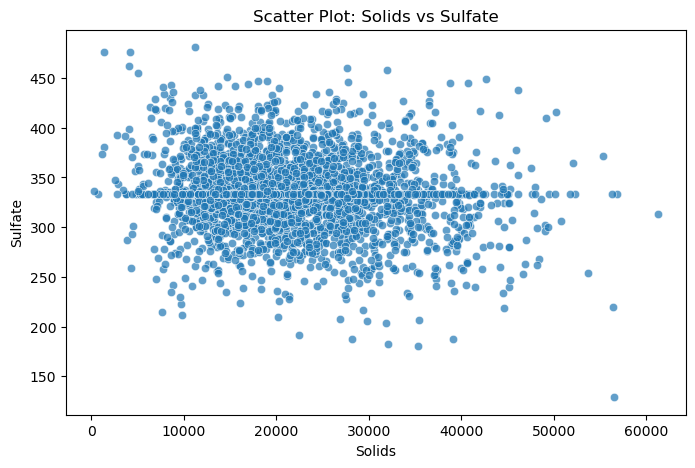

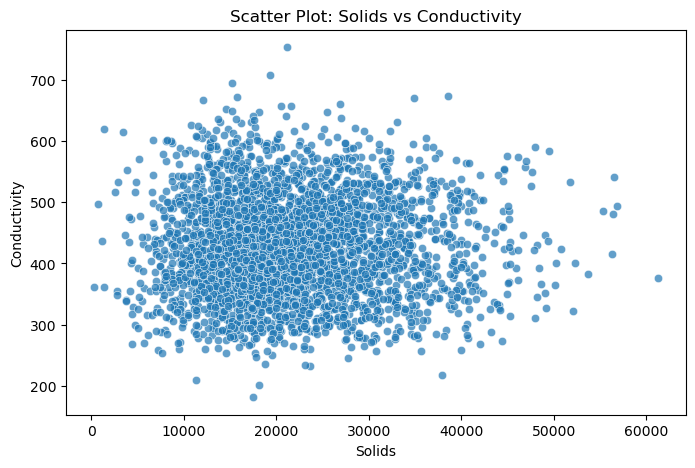

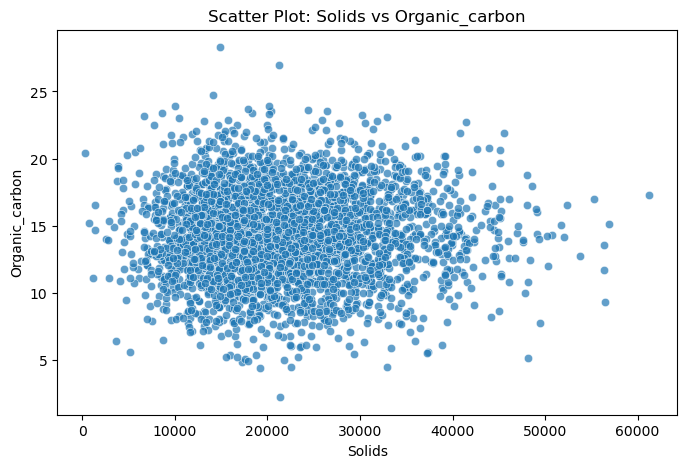

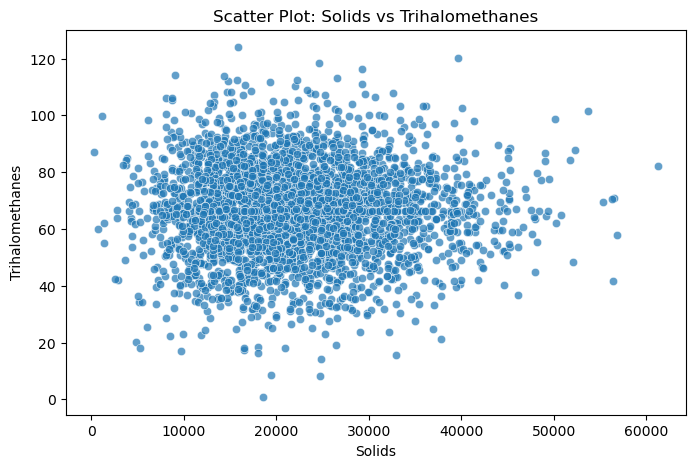

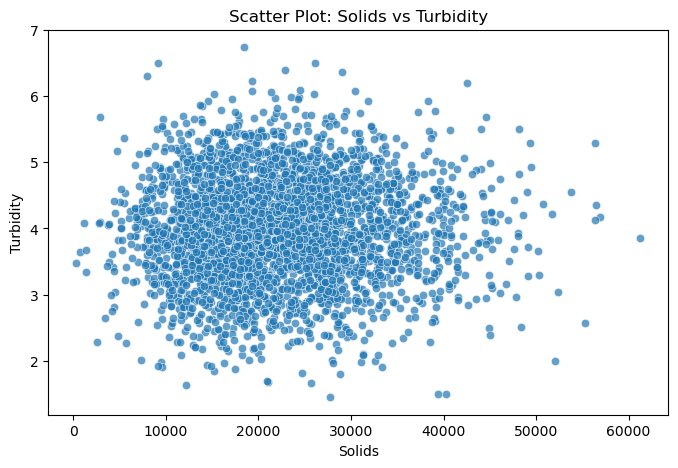

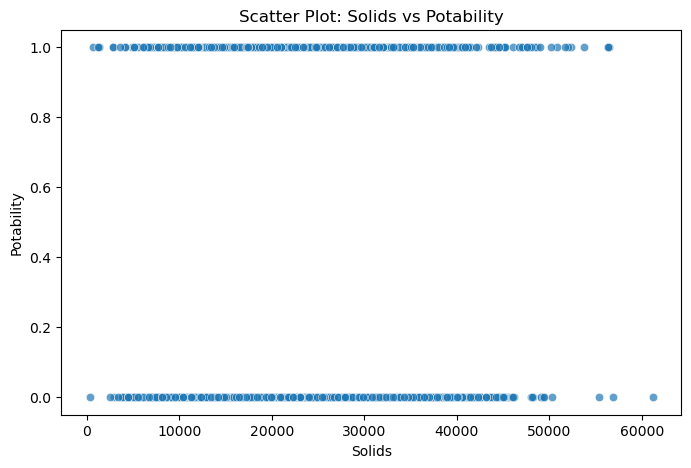

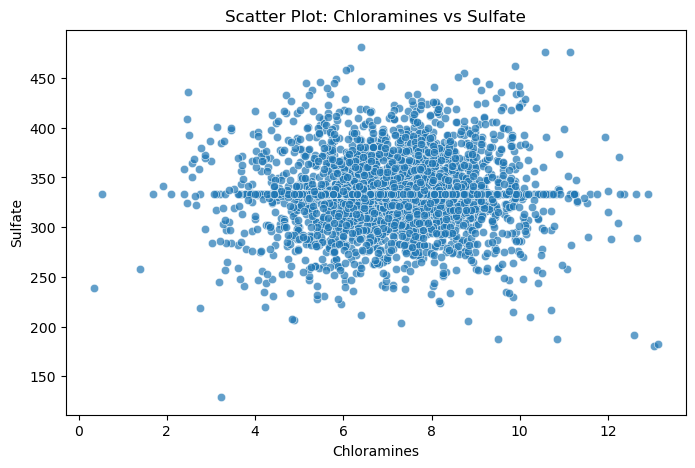

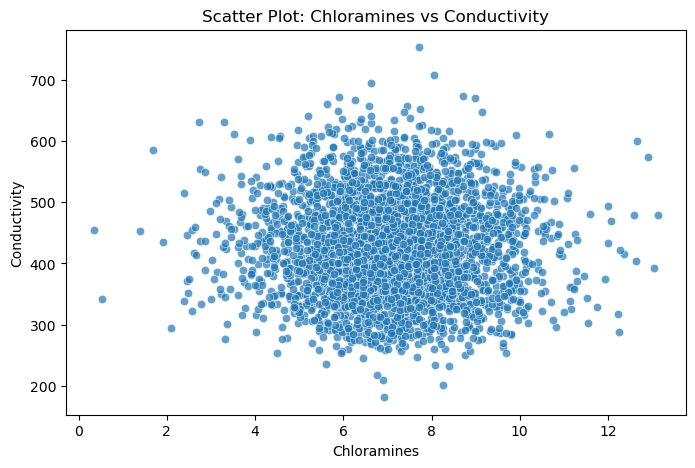

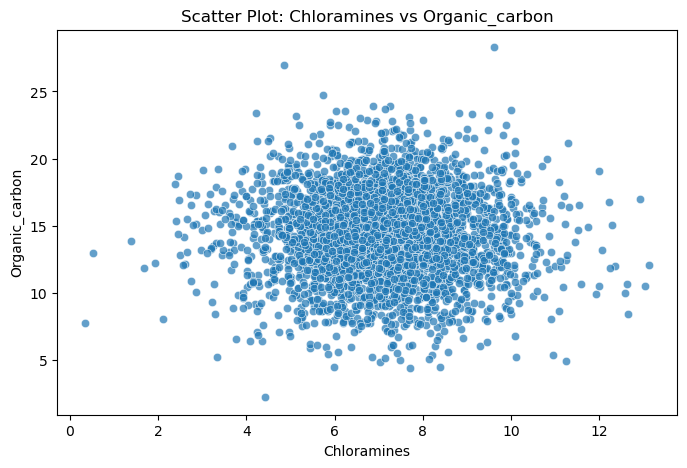

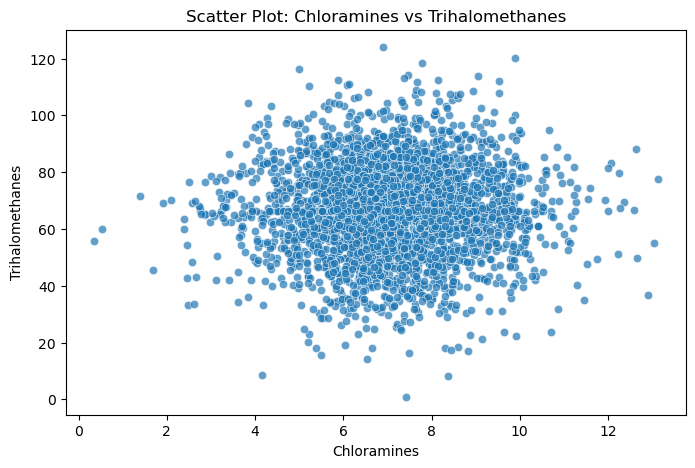

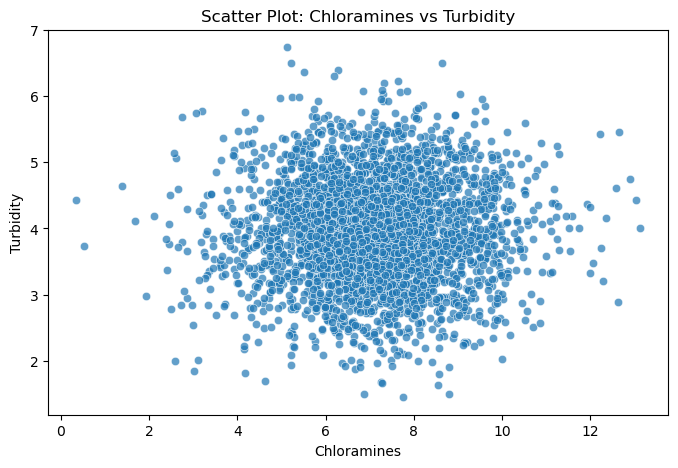

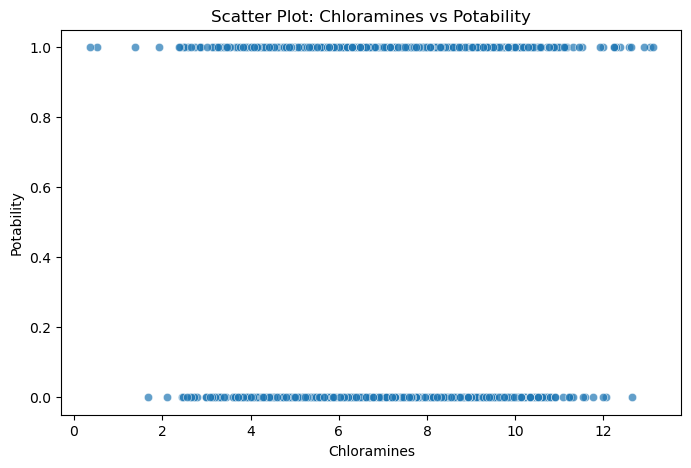

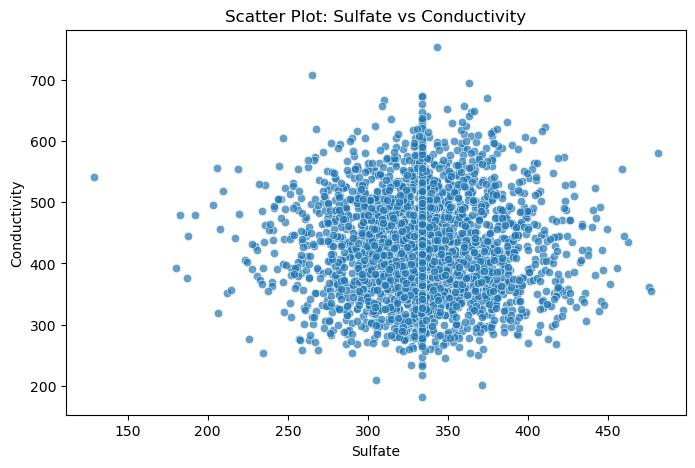

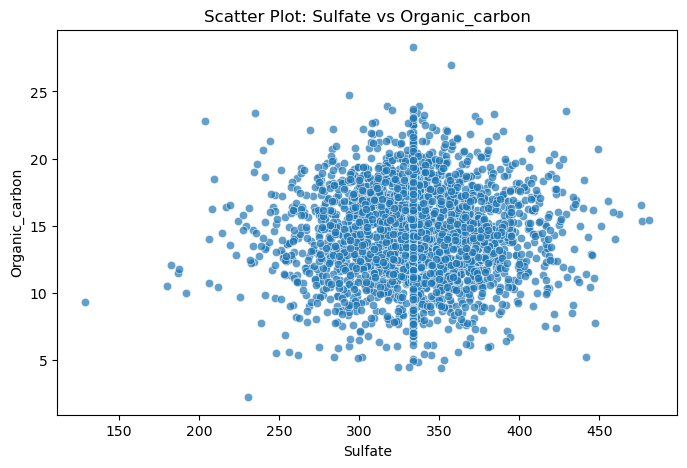

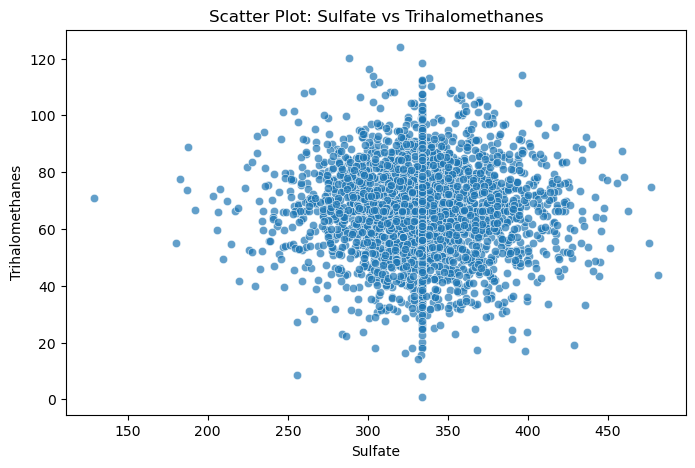

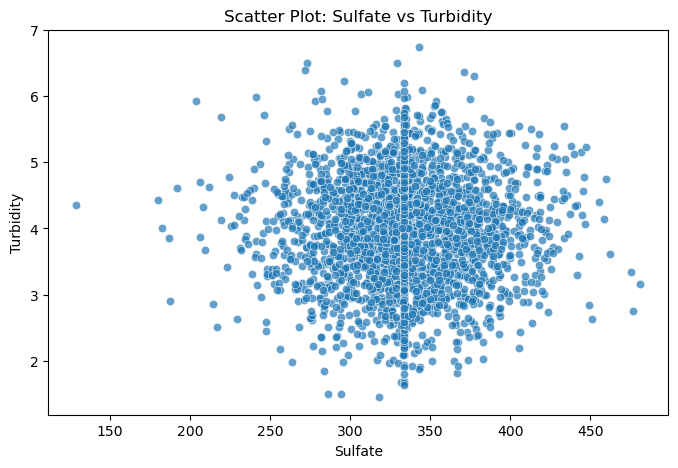

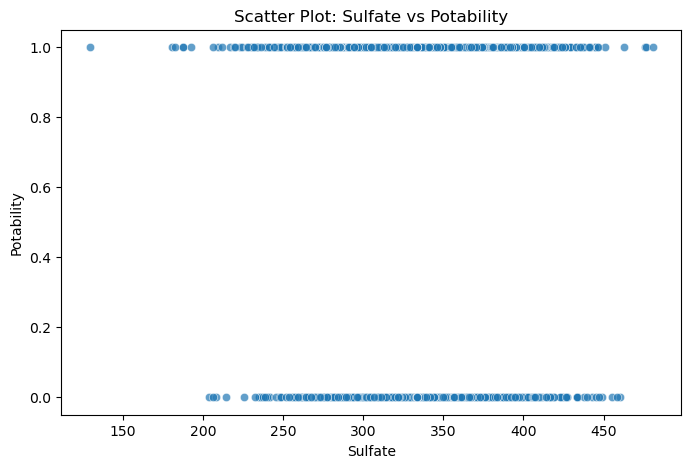

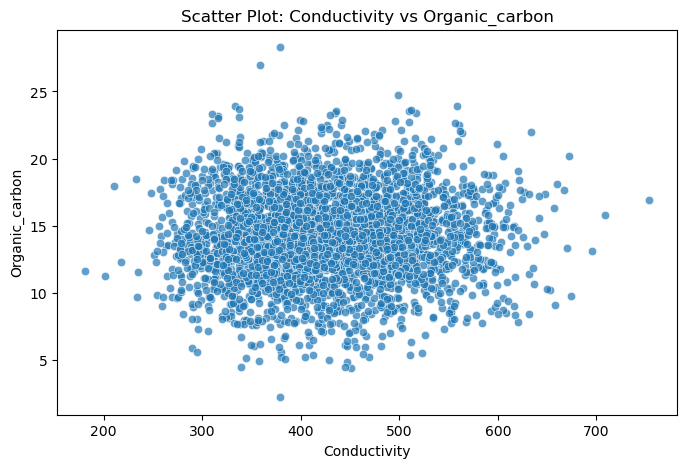

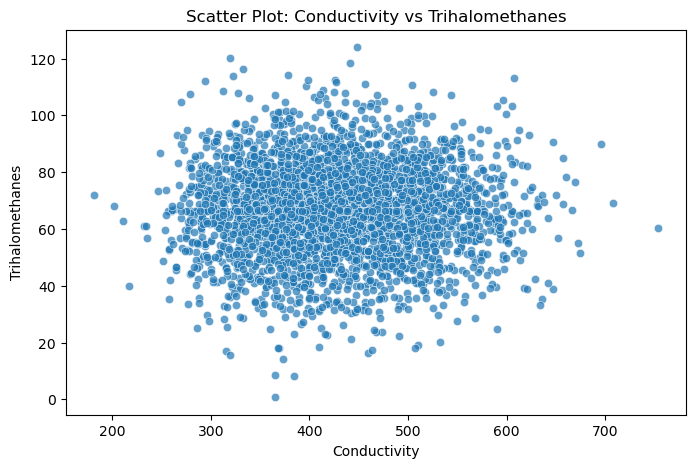

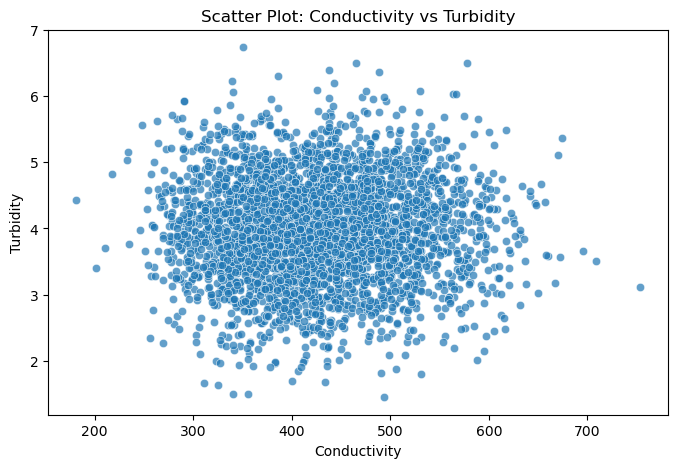

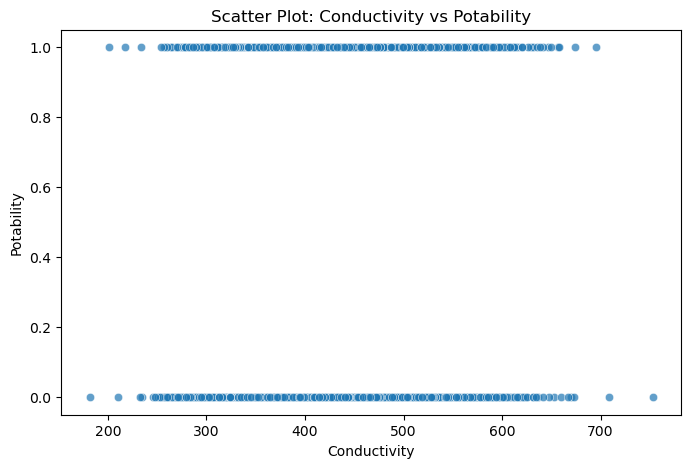

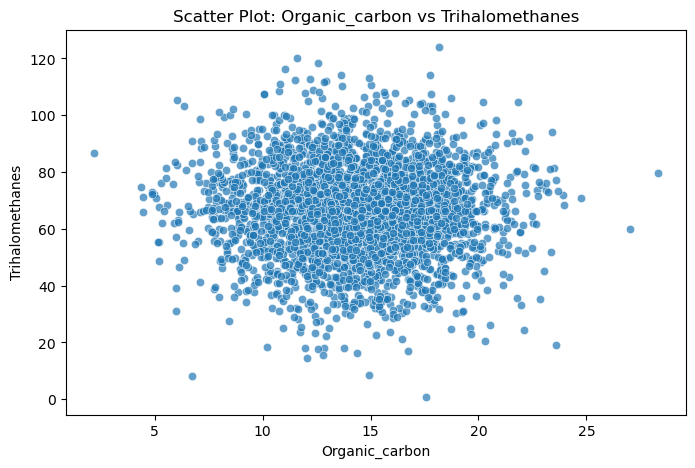

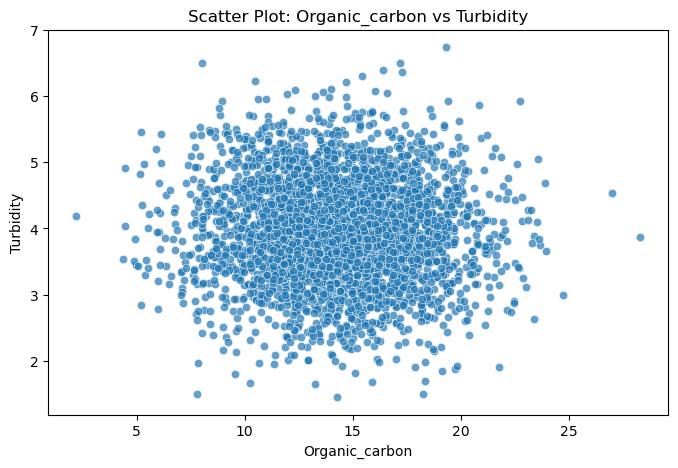

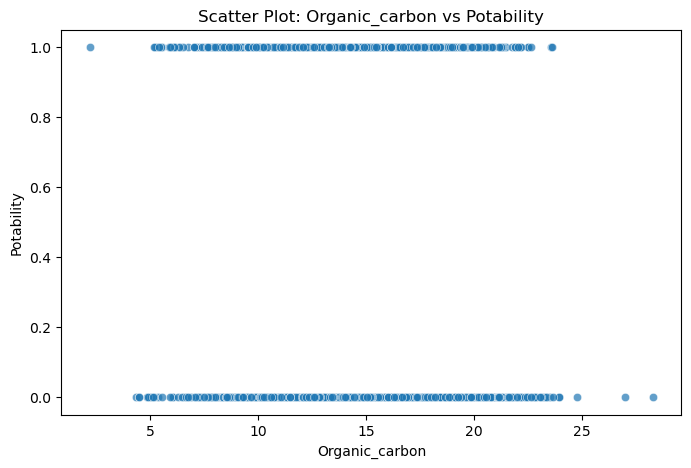

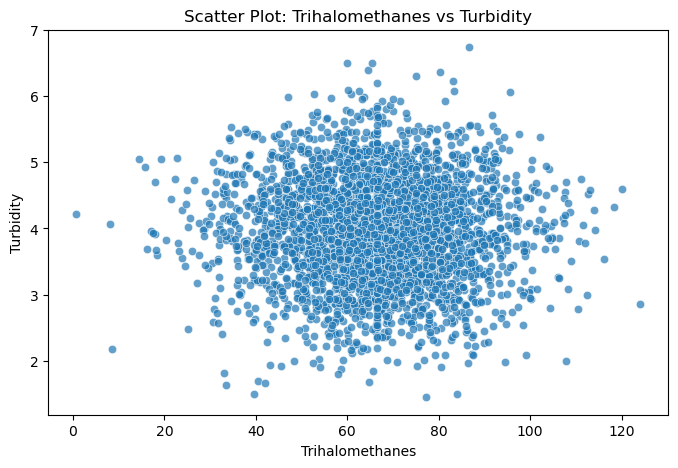

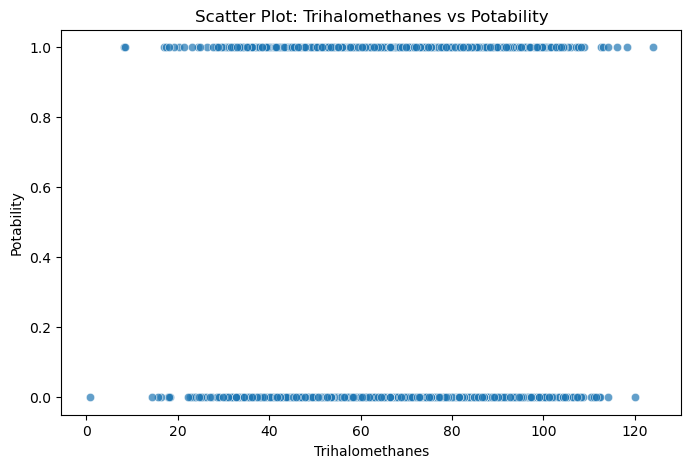

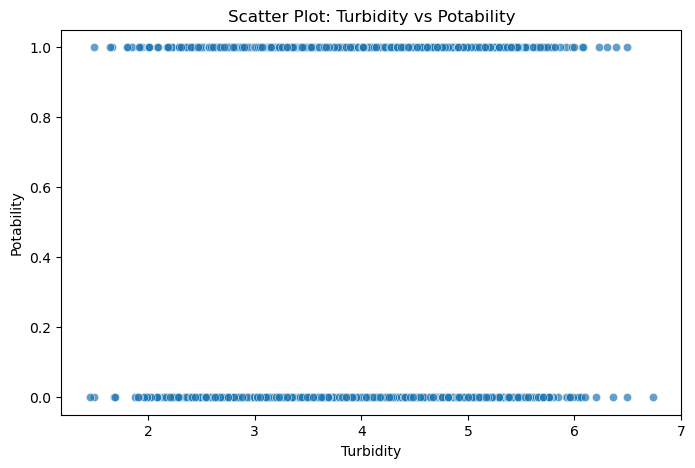

In [67]:
# Loop through all pairs of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):  # Avoid repeating plots
        plt.figure(figsize=(8, 5))
        sb.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], alpha=0.7)
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f'Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.show()

In [73]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

print("Correlation Matrix (Numerical Columns Only):")
print(correlation_matrix)

Correlation Matrix (Numerical Columns Only):
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness

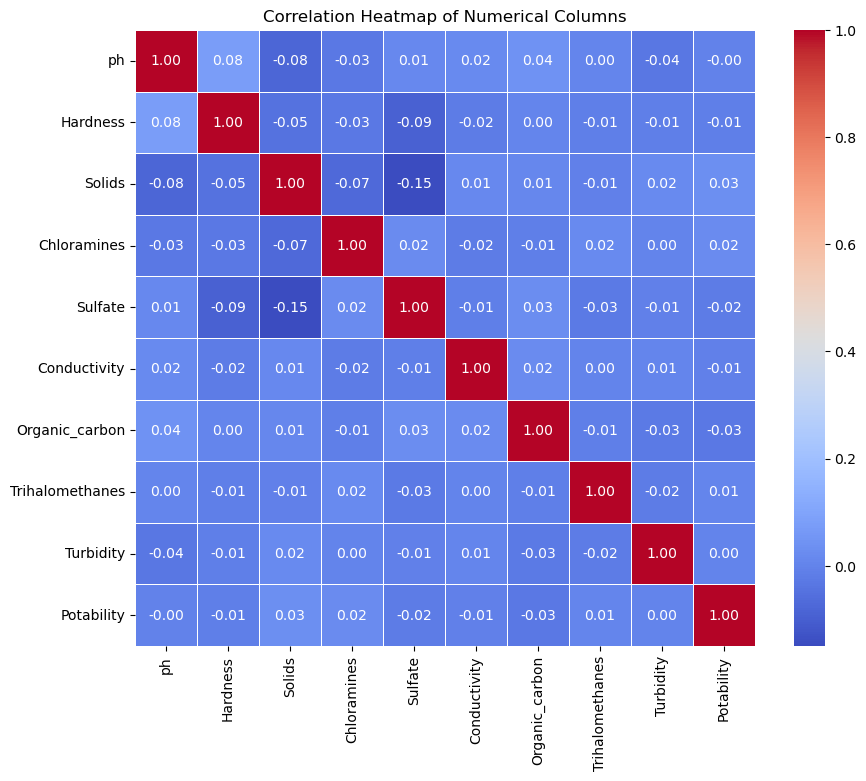

In [75]:
#Heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()